In [4]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.cluster.hierarchy import dendrogram, linkage

# Load data

In [5]:
n = 300
N = 3 * n
D = 2
shift = 4

mu0 = np.array([0,0])
mu1 = np.array([0,shift])
mu2 = np.array([shift,shift])

X = np.random.randn(N, D)
X[:n] += mu0
X[n:2*n] += mu1
X[2*n:] += mu2


# Use scipy for clustring generated cloud data

Z.shape: (899, 4)


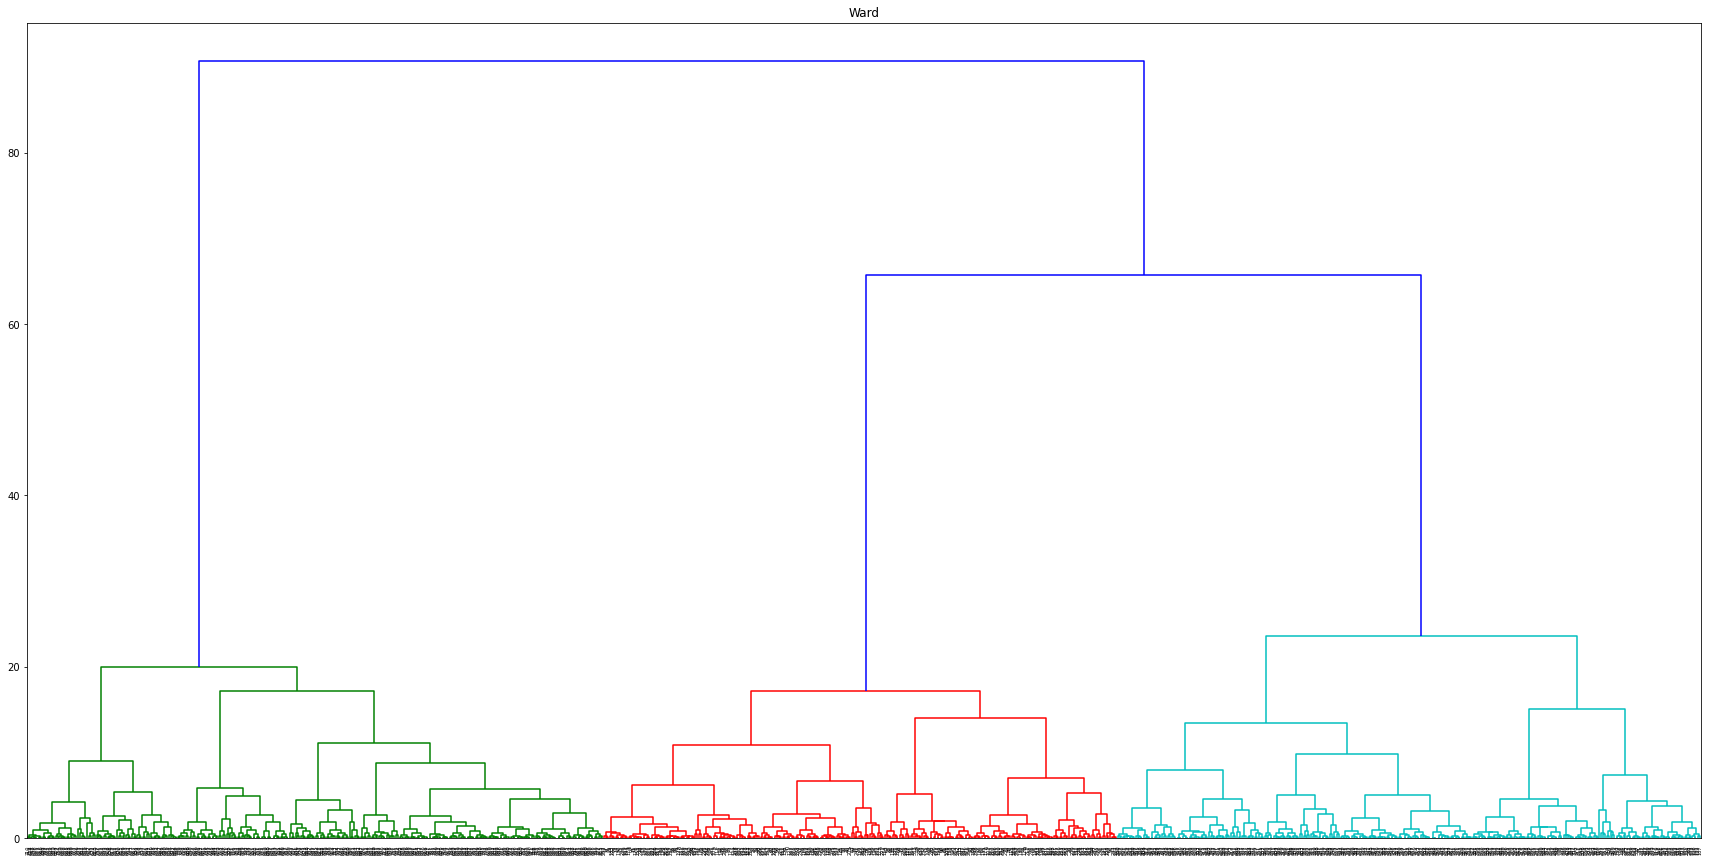

In [6]:
Z = linkage(X, 'ward')
print("Z.shape:", Z.shape)
# Z has the format [idx1, idx2, dist, sample_count]
# therefore, its size will be (N-1, 4)

# from documentation:
# A (n-1) by 4 matrix Z is returned. At the i-th iteration,
# clusters with indices Z[i, 0] and Z[i, 1] are combined to
# form cluster n + i. A cluster with an index less than n
# corresponds to one of the original observations.
# The distance between clusters Z[i, 0] and Z[i, 1] is given
# by Z[i, 2]. The fourth value Z[i, 3] represents the number
# of original observations in the newly formed cluster.
plt.figure(figsize=(30, 15))
plt.title("Ward")
dendrogram(Z)
plt.show()


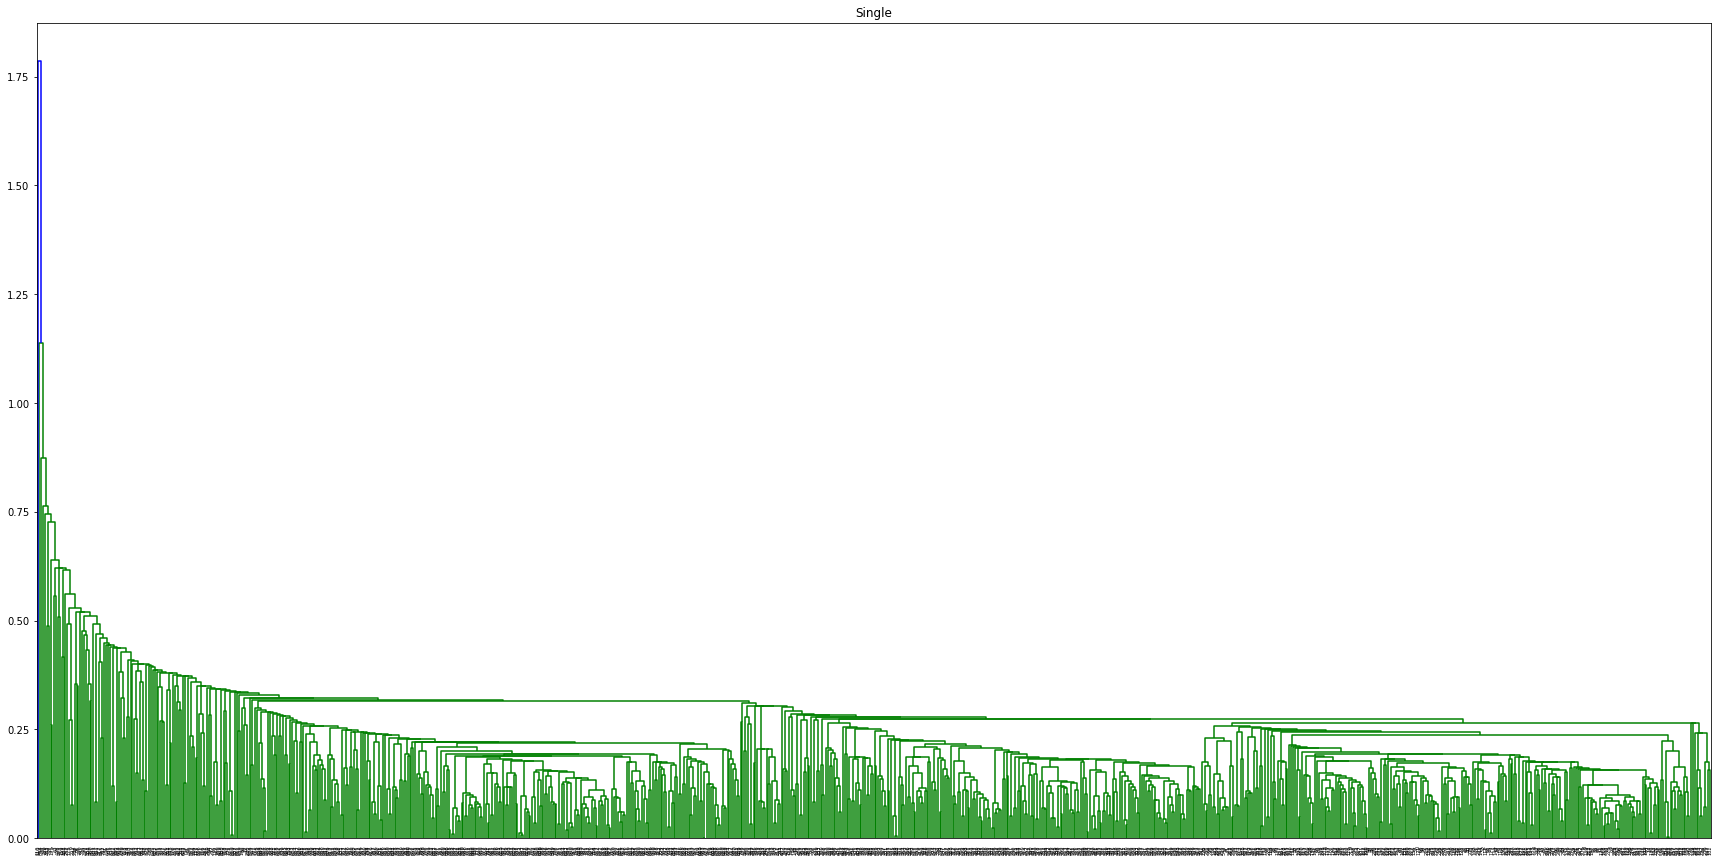

In [7]:
Z = linkage(X, 'single')
plt.figure(figsize=(30, 15))
plt.title("Single")
dendrogram(Z)
plt.show()

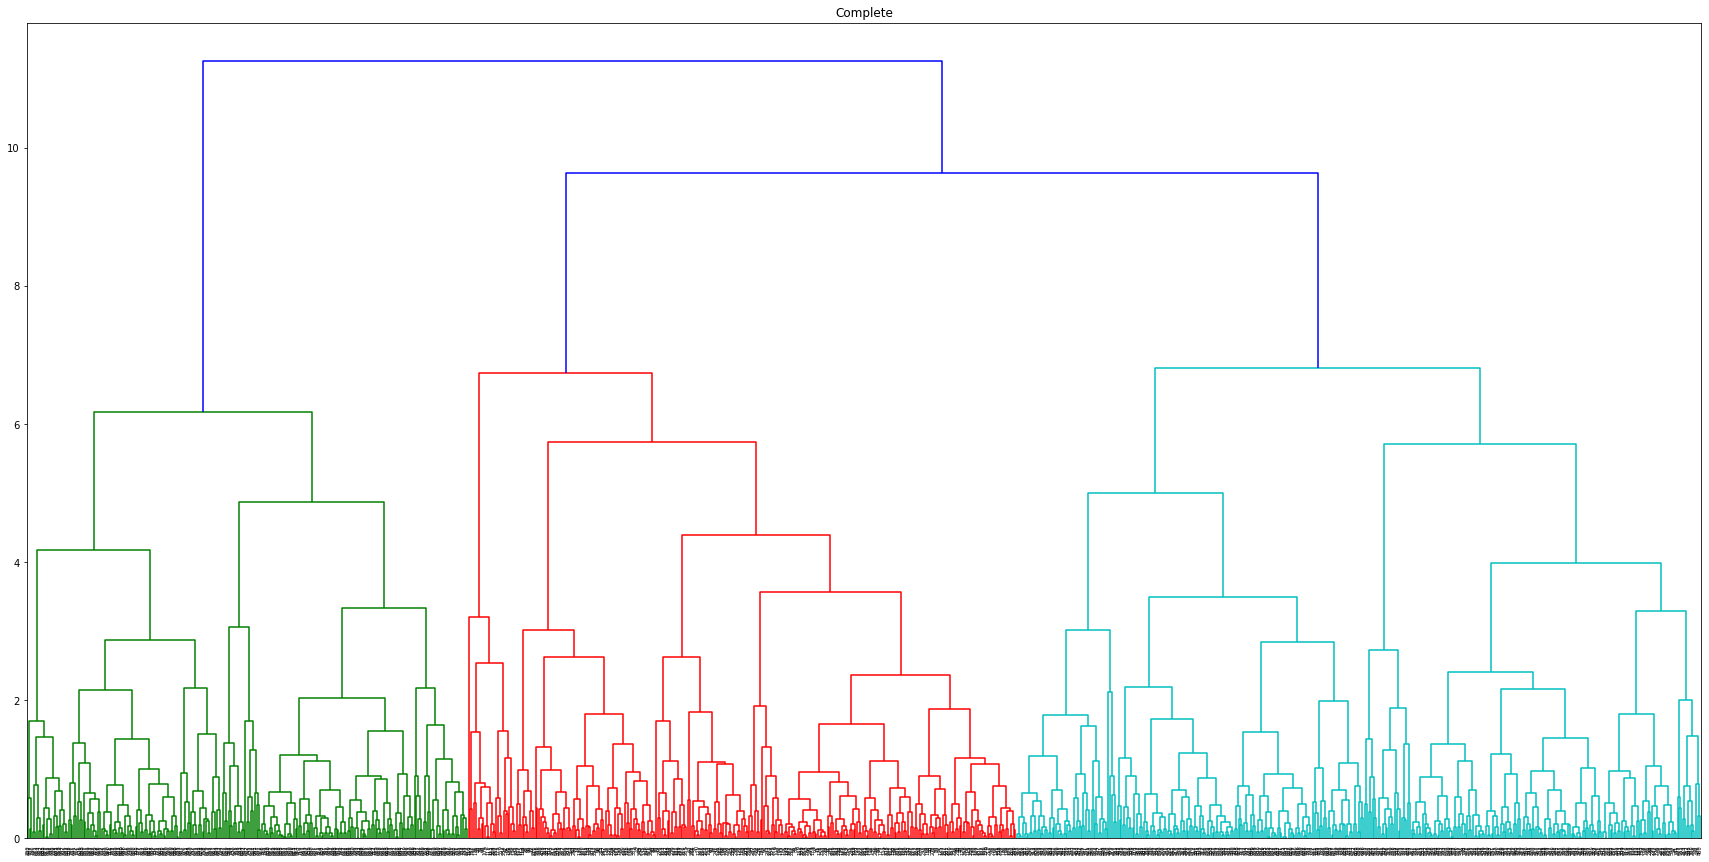

In [8]:
Z = linkage(X, 'complete')
plt.figure(figsize=(30, 15))
plt.title("Complete")
dendrogram(Z)
plt.show()

# Clustering of simulated DNA strings

In [9]:
import random

In [10]:
# convert list of integers to corresponding letters
def to_code(a):
  return [code[i] for i in a]


# distance between 2 DNA strands
def dist(a, b):
  return sum(i != j for i, j in zip(a, b))


# generate offspring by modifying some characters in the code
def generate_offspring(parent):
  return [maybe_modify(c) for c in parent]


# modify letter c with probability ~1/1000
def maybe_modify(c):
  if np.random.random() < 0.001:
    return np.random.choice(code)
  return c

In [11]:
# our genetic code
code = ['A', 'T', 'C', 'G']

# create 3 distinct ancestors
p1 = to_code(np.random.randint(4, size=1000))
p2 = to_code(np.random.randint(4, size=1000))
p3 = to_code(np.random.randint(4, size=1000))

# create offspring
num_generations = 99
max_offspring_per_generation = 1000
current_generation = [p1, p2, p3]


for i in range(num_generations):
  next_generation = []
  for parent in current_generation:
    # each parent will have between 1 and 3 children
    num_offspring = np.random.randint(3) + 1

    # generate the offspring
    for _ in range(num_offspring):
      child = generate_offspring(parent)
      next_generation.append(child)

  current_generation = next_generation

  # limit the number of offspring
  random.shuffle(current_generation)
  current_generation = current_generation[:max_offspring_per_generation]

  print("Finished creating generation %d / %d, size = %d" % (i + 2, num_generations + 1, len(current_generation)))

Finished creating generation 2 / 100, size = 8
Finished creating generation 3 / 100, size = 18
Finished creating generation 4 / 100, size = 32
Finished creating generation 5 / 100, size = 59
Finished creating generation 6 / 100, size = 130
Finished creating generation 7 / 100, size = 280
Finished creating generation 8 / 100, size = 576
Finished creating generation 9 / 100, size = 1000
Finished creating generation 10 / 100, size = 1000
Finished creating generation 11 / 100, size = 1000
Finished creating generation 12 / 100, size = 1000
Finished creating generation 13 / 100, size = 1000
Finished creating generation 14 / 100, size = 1000
Finished creating generation 15 / 100, size = 1000
Finished creating generation 16 / 100, size = 1000
Finished creating generation 17 / 100, size = 1000
Finished creating generation 18 / 100, size = 1000
Finished creating generation 19 / 100, size = 1000
Finished creating generation 20 / 100, size = 1000
Finished creating generation 21 / 100, size = 1000


In [13]:
import scipy.spatial.distance as ssd

# create distance matrix
# note: you can also use scipy's pdist for this
# but NOT sklearn's pairwise_distances function
# which does not return a symmetric matrix
N = len(current_generation)
dist_matrix = np.zeros((N, N))
for i in range(N):
  for j in range(N):
    if i == j:
      continue
    elif j > i:
      a = current_generation[i]
      b = current_generation[j]
      dist_matrix[i,j] = dist(a, b)
    else:
      dist_matrix[i,j] = dist_matrix[j,i]

dist_array = ssd.squareform(dist_matrix)

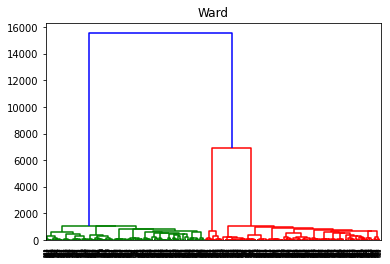

In [14]:
Z = linkage(dist_array, 'ward')
plt.title("Ward")
dendrogram(Z)
plt.show()

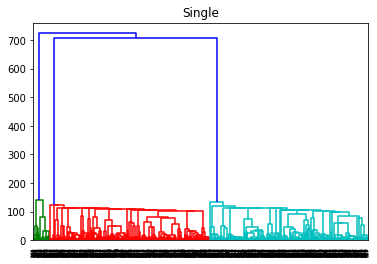

In [15]:
Z = linkage(dist_array, 'single')
plt.title("Single")
dendrogram(Z)
plt.show()

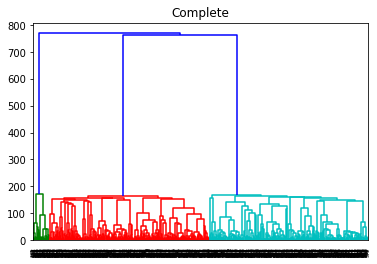

In [16]:
Z = linkage(dist_array, 'complete')
plt.title("Complete")
dendrogram(Z)
plt.show()